In [115]:
# 数据增强
from tensorflow.keras.preprocessing.image import ImageDataGenerator

path = "./dataset/apple/original_data"  # 图片加强的文件路径
dst_path = "gen_data"
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.02,
    horizontal_flip=True,
    vertical_flip=True,
)
gen = datagen.flow_from_directory(
    path,
    target_size=(224, 224),
    batch_size=2,
    save_to_dir=dst_path,
    save_prefix="gen",
    save_format="jpg",
)
for i in range(100):
    next(gen)

Found 10 images belonging to 1 classes.


In [116]:
# load the image
from tensorflow.keras.preprocessing.image import load_img, img_to_array

img_path = "./dataset/apple/1.jpg"
img = load_img(img_path, target_size=(224, 224))
type(img)

PIL.Image.Image

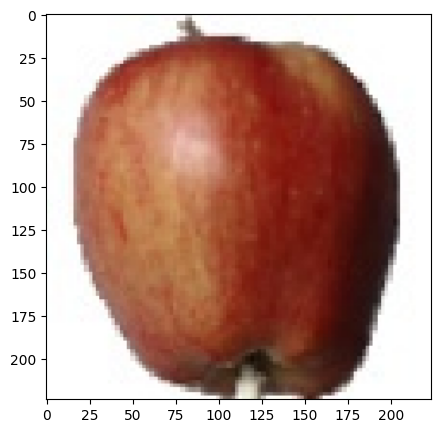

In [117]:
#visualizWe the image
%matplotlib inline
from matplotlib import pyplot as plt

fig1 = plt.figure(figsize=(5,5))
plt.imshow(img)
plt.show()

In [118]:
img = img_to_array(img)
type(img)
print(img.shape)

(224, 224, 3)


In [119]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
import numpy as np
# include_top 不需要输出层，只需要特征
model_vgg = VGG16(weights="imagenet", include_top=False)

# 将PIL图像转换为NumPy数组，并添加一个维度以模拟批次
X = np.expand_dims(img, axis=0)
X = preprocess_input(X)
print(X.shape)

(1, 224, 224, 3)


In [120]:
# 特征提取
features = model_vgg.predict(X)
print(features.shape)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 495ms/step
(1, 7, 7, 512)


In [121]:
# flatten
features = features.reshape(1, 7 * 7 * 512)
print(features.shape)

(1, 25088)


In [122]:
# list all the names of the data
import os

folder = "./dataset/apple/train_data"
dirs = os.listdir(folder)
print(dirs)


['10.jpg', '11.jpg', '13.jpg', '14.jpg', '15.jpg', '16.jpg', '17.jpg', '18.jpg', '19.jpg', '20.jpg', '21.jpg', '22.jpg', '23.jpg', '24.jpg', '25.jpg', '36_100.jpg', '38_100.jpg', '3_100.jpg', '4-0.jpg', '4-1.jpg', '4-2.jpg', '4-3.jpg', '4-4.jpg', '4-5.jpg', '4-6.jpg', '4-7.jpg', '4-8.jpg', '4-9.jpg', '8.jpg', '9.jpg', 'gen_0_100234.jpg', 'gen_0_2419568.jpg', 'gen_0_3276820.jpg', 'gen_0_3309590.jpg', 'gen_0_334889.jpg', 'gen_0_3554009.jpg', 'gen_0_3835423.jpg', 'gen_0_410363.jpg', 'gen_0_4213939.jpg', 'gen_0_6164392.jpg', 'gen_0_6223044.jpg', 'gen_0_6306318.jpg', 'gen_0_7342080.jpg', 'gen_0_7343719.jpg', 'gen_0_9114649.jpg', 'gen_0_9129064.jpg', 'gen_0_9421620.jpg', 'gen_0_9505120.jpg', 'gen_0_9601813.jpg', 'gen_0_9627209.jpg', 'gen_1_132962.jpg', 'gen_1_1835687.jpg', 'gen_1_2020840.jpg', 'gen_1_2075676.jpg', 'gen_1_3144650.jpg', 'gen_1_3831991.jpg', 'gen_1_4035954.jpg', 'gen_1_4354350.jpg', 'gen_1_4561427.jpg', 'gen_1_4798457.jpg', 'gen_1_5094846.jpg', 'gen_1_5198983.jpg', 'gen_1_58511

In [123]:
# 名称合并
img_path = []
for i in dirs:
    if os.path.splitext(i)[1] == ".jpg":
        img_path.append(i)
img_path = [folder + "//" + i for i in img_path]
print(img_path)

['./dataset/apple/train_data//10.jpg', './dataset/apple/train_data//11.jpg', './dataset/apple/train_data//13.jpg', './dataset/apple/train_data//14.jpg', './dataset/apple/train_data//15.jpg', './dataset/apple/train_data//16.jpg', './dataset/apple/train_data//17.jpg', './dataset/apple/train_data//18.jpg', './dataset/apple/train_data//19.jpg', './dataset/apple/train_data//20.jpg', './dataset/apple/train_data//21.jpg', './dataset/apple/train_data//22.jpg', './dataset/apple/train_data//23.jpg', './dataset/apple/train_data//24.jpg', './dataset/apple/train_data//25.jpg', './dataset/apple/train_data//36_100.jpg', './dataset/apple/train_data//38_100.jpg', './dataset/apple/train_data//3_100.jpg', './dataset/apple/train_data//4-0.jpg', './dataset/apple/train_data//4-1.jpg', './dataset/apple/train_data//4-2.jpg', './dataset/apple/train_data//4-3.jpg', './dataset/apple/train_data//4-4.jpg', './dataset/apple/train_data//4-5.jpg', './dataset/apple/train_data//4-6.jpg', './dataset/apple/train_data//4-

In [124]:
# define a method to extract the features
def model_processing(img_path, model):
    img = load_img(img_path, target_size=(224, 224))
    img = img_to_array(img)
    X = np.expand_dims(img, axis=0)
    X = preprocess_input(X)
    X_VGG = model.predict(X)
    X_VGG = X_VGG.reshape(1, 7 * 7 * 512)
    return X_VGG

In [125]:
# 图像批量处理
features_train = np.zeros([len(img_path), 7 * 7 * 512])
for i in range(len(img_path)):
    feature_i = model_processing(img_path[i], model_vgg)
    print("preprocessed:", img_path[i])
    features_train[i] = feature_i

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step
preprocessed: ./dataset/apple/train_data//10.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step
preprocessed: ./dataset/apple/train_data//11.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step
preprocessed: ./dataset/apple/train_data//13.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step
preprocessed: ./dataset/apple/train_data//14.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step
preprocessed: ./dataset/apple/train_data//15.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 287ms/step
preprocessed: ./dataset/apple/train_data//16.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step
preprocessed: ./dataset/apple/train_data//17.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step
preprocessed: ./dataset/apple/train_data//18.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step
preprocessed: ./dataset/apple/train_data//19.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step
preprocessed: ./dataset/apple/train_data//20.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step
preprocessed: ./dataset/apple/train_data//21.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 257m

In [126]:
print(features_train.shape)

(230, 25088)


In [127]:
# define X;30张图片里面有10个普通苹果
# 通过图像增强以后，又增加了200个普通苹果
# 230个苹果里面，有210个普通苹果（类别数量多），20个（类别数量少）
# 通过众数纠正无监督学习的结果
X = features_train

In [128]:
# set up a kmeans- un-supervised model
from sklearn.cluster import KMeans

cnn_kmeans = KMeans(n_clusters=2, max_iter=2000)
cnn_kmeans.fit(X)

KMeans(max_iter=2000, n_clusters=2)

In [170]:
print(type(cnn_kmeans))

cnn_kmeans.get_params(True)

<class 'sklearn.cluster._kmeans.KMeans'>


{'algorithm': 'lloyd',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 2000,
 'n_clusters': 2,
 'n_init': 'auto',
 'random_state': None,
 'tol': 0.0001,
 'verbose': 0}

In [129]:
# make prediction
y_predict_kmeans = cnn_kmeans.predict(X)
print(y_predict_kmeans)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0 0 0 0 0
 0 0 1 1 1 0 0 1 0 1 0 0 1 1 0 1 1 0 0 1 0 0 0 1 1 0 0 1 1 1 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 1 1 0 1 0 1 1 0 1 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0 1 1 1 1
 0 0 0 0 0 1 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 1 0 0
 0 0 0 1 0 1 0 1 0 0 1 1 1 0 1 0 0 1 1 1 1 0 0 1 1 1 1 0 0 1 1 0 1 1 1 1 0
 1 0 0 1 0 1 1 0 0 1 0 1 0 0 0 1 0 1 1 1 1 1 1 0 0 1 0 0 0 0 1 0 1 1 0 0 0
 1 1 0 0 1 1 1 0]


In [130]:
from collections import Counter

# 预测结果统计
# 期望是两个类别：正常苹果 213 个，其他苹果 17 个
print(Counter(y_predict_kmeans))

Counter({0: 130, 1: 100})


In [131]:
normal_apple_id = 1

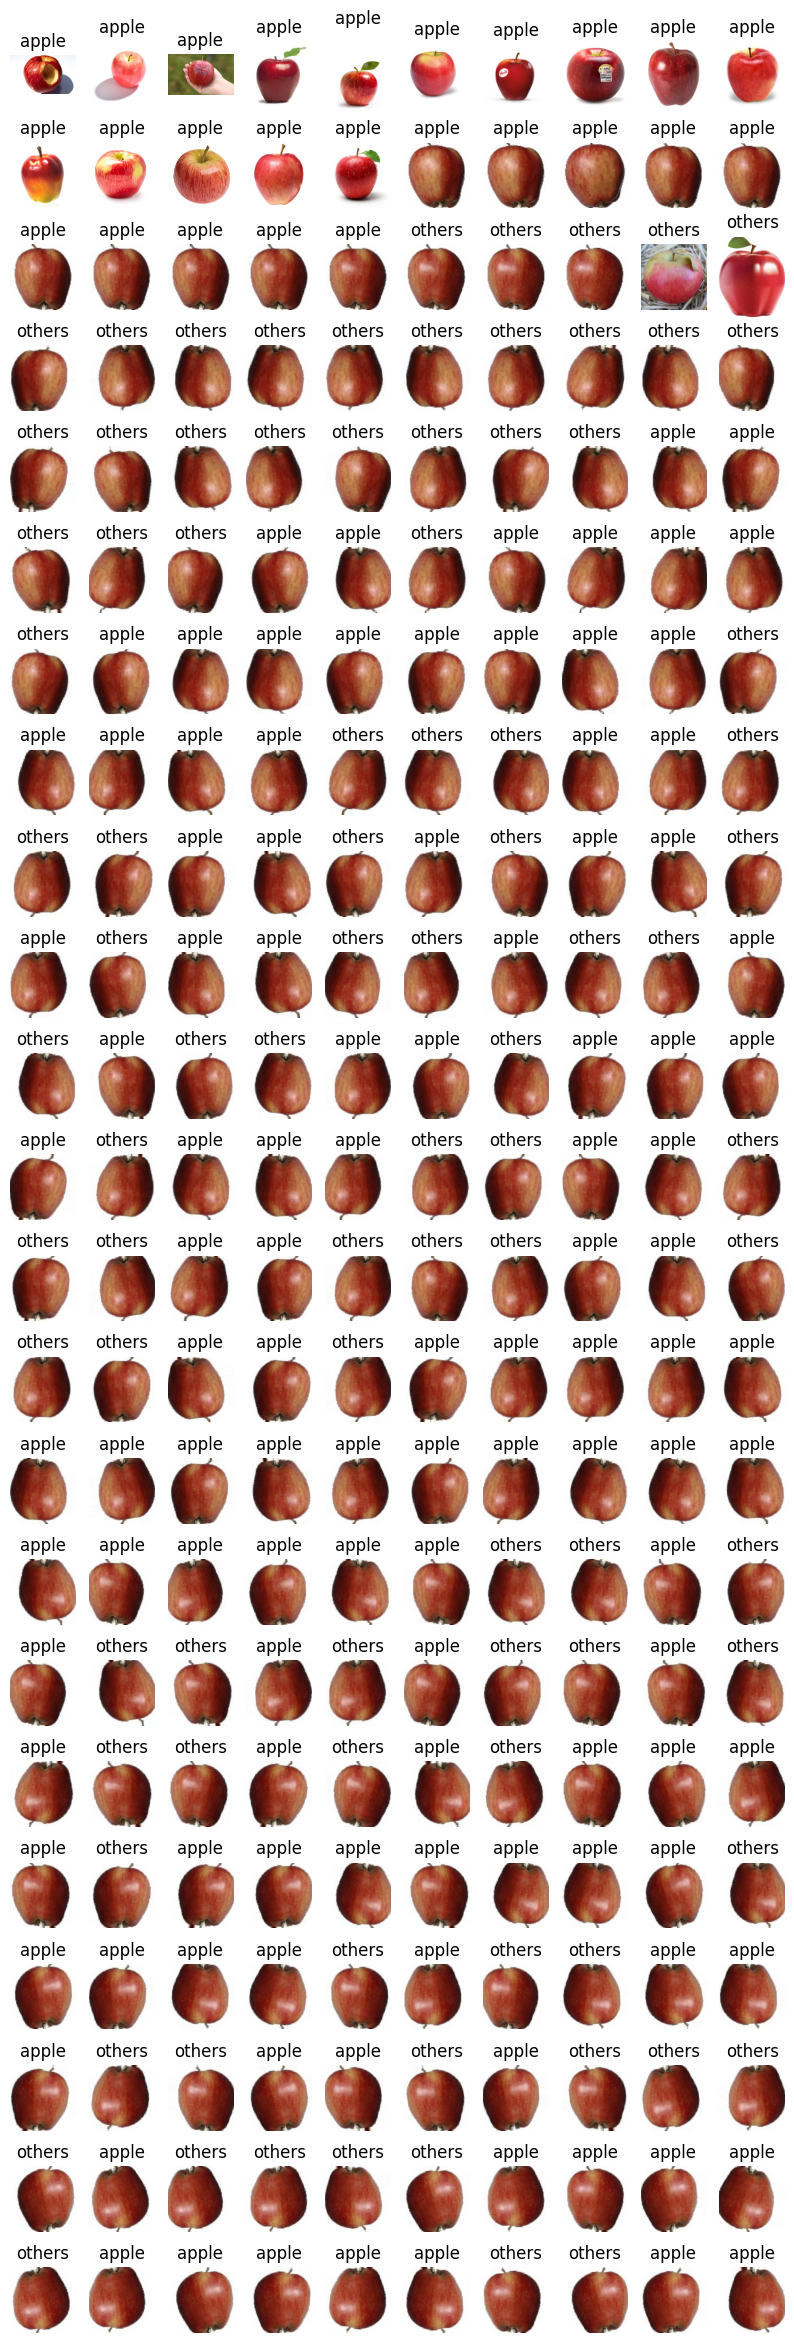

In [166]:
# visualize the result
fig2 = plt.figure(figsize=(10, 30))
for i in range(23): # 23 行
    for j in range(10): # 每行 10 张苹果
        img = load_img(img_path[i * 10 + j])  # read the image
        plt.subplot(23, 10, i * 10 + j + 1)
        plt.title(
            "apple" if y_predict_kmeans[i * 5 + j] == normal_apple_id else "others"
        )
        plt.imshow(img), plt.axis("off")
plt.show()

In [133]:
# list all the names of the data
import os

folder_test = "./dataset/apple/test_data"
dirs_test = os.listdir(folder_test)
print(dirs)

['10.jpg', '11.jpg', '13.jpg', '14.jpg', '15.jpg', '16.jpg', '17.jpg', '18.jpg', '19.jpg', '20.jpg', '21.jpg', '22.jpg', '23.jpg', '24.jpg', '25.jpg', '36_100.jpg', '38_100.jpg', '3_100.jpg', '4-0.jpg', '4-1.jpg', '4-2.jpg', '4-3.jpg', '4-4.jpg', '4-5.jpg', '4-6.jpg', '4-7.jpg', '4-8.jpg', '4-9.jpg', '8.jpg', '9.jpg', 'gen_0_100234.jpg', 'gen_0_2419568.jpg', 'gen_0_3276820.jpg', 'gen_0_3309590.jpg', 'gen_0_334889.jpg', 'gen_0_3554009.jpg', 'gen_0_3835423.jpg', 'gen_0_410363.jpg', 'gen_0_4213939.jpg', 'gen_0_6164392.jpg', 'gen_0_6223044.jpg', 'gen_0_6306318.jpg', 'gen_0_7342080.jpg', 'gen_0_7343719.jpg', 'gen_0_9114649.jpg', 'gen_0_9129064.jpg', 'gen_0_9421620.jpg', 'gen_0_9505120.jpg', 'gen_0_9601813.jpg', 'gen_0_9627209.jpg', 'gen_1_132962.jpg', 'gen_1_1835687.jpg', 'gen_1_2020840.jpg', 'gen_1_2075676.jpg', 'gen_1_3144650.jpg', 'gen_1_3831991.jpg', 'gen_1_4035954.jpg', 'gen_1_4354350.jpg', 'gen_1_4561427.jpg', 'gen_1_4798457.jpg', 'gen_1_5094846.jpg', 'gen_1_5198983.jpg', 'gen_1_58511

In [134]:
# 名称合并路径
img_path_test = []
for i in dirs_test:
    if os.path.splitext(i)[1] == ".jpg":
        img_path_test.append(i)

img_path_test = [folder_test + "//" + i for i in img_path_test]

print(type(img_path_test), len(img_path_test))
print(img_path_test[0])

<class 'list'> 12
./dataset/apple/test_data//1.jpg


In [135]:
features_test = np.zeros([len(img_path_test), 7 * 7 * 512])
print(features_test.shape)
print(features_test[0])

(12, 25088)
[0. 0. 0. ... 0. 0. 0.]


In [136]:
for i in range(len(img_path_test)):
    feature_i = model_processing(img_path_test[i], model_vgg)
    print("preprocessed:", img_path_test[i])
    features_test[i] = feature_i
X_test = features_test

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 305ms/step
preprocessed: ./dataset/apple/test_data//1.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step
preprocessed: ./dataset/apple/test_data//3.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 287ms/step
preprocessed: ./dataset/apple/test_data//xx_0_1133520.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step
preprocessed: ./dataset/apple/test_data//xx_12_5963907.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step
preprocessed: ./dataset/apple/test_data//xx_14_6969294.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step
preprocessed: ./dataset/apple/test_data//xx_1_586816.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step
preprocessed: ./dataset/apple/test_data//xx_2_1588073.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step
preprocessed: ./dataset/apple/test_data//xx_3_3378731.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step
preprocessed: ./dataset/apple/test_data//xx_5_4481562.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
preprocessed: ./dataset/apple/test_data//xx_7_4698934.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step
preprocessed

In [137]:
print(features_test.shape)
print(features_test[0])

(12, 25088)
[0.         0.         0.         ... 0.         1.24546313 0.        ]


In [138]:
y_predict_kmeans_test = cnn_kmeans.predict(X_test)
print(y_predict_kmeans_test)

[0 0 0 1 0 0 0 0 0 1 0 0]


In [139]:
normal_apple_id = 1

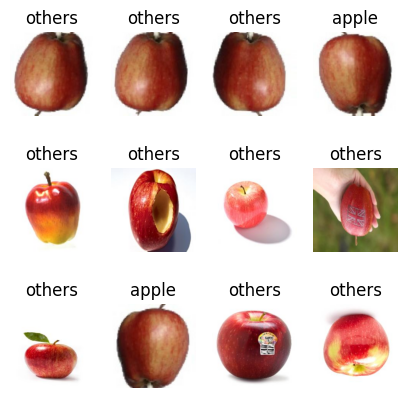

In [140]:
# visualize the result

fig3 = plt.figure(figsize=(5, 5))
for i in range(3):
    for j in range(4):
        img = load_img(img_path_test[i * 4 + j])  # read the image
        plt.subplot(3, 4, i * 4 + j + 1)
        plt.title(
            "apple" if y_predict_kmeans_test[i * 4 + j] == normal_apple_id else "others"
        )
        plt.imshow(img), plt.axis("off")

plt.show()

In [141]:
# meanshift
from sklearn.cluster import MeanShift, estimate_bandwidth

# obtain the bandwidth
bw = estimate_bandwidth(X, n_samples=140)
print(bw)

1236.6466632969834


In [142]:
# set up meanshift model
cnn_ms = MeanShift(bandwidth=bw)
cnn_ms.fit(X)

MeanShift(bandwidth=1236.6466632969834)

In [171]:
print(type(cnn_ms))
cnn_ms.get_params(True)

<class 'sklearn.cluster._mean_shift.MeanShift'>


{'bandwidth': 1236.6466632969834,
 'bin_seeding': False,
 'cluster_all': True,
 'max_iter': 300,
 'min_bin_freq': 1,
 'n_jobs': None,
 'seeds': None}

In [143]:
# make prediction
y_predict_ms = cnn_ms.predict(X)

In [169]:
print(type(y_predict_ms))
print(y_predict_ms.shape)
print(y_predict_ms)

<class 'numpy.ndarray'>
(230,)
[10  6 11  0  7  0  4  8  0  0  3  0  9  2  5  0  0  0  0  0  0  0  0  0
  0  0  0  0  1 12  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0]


In [145]:
# 预测结果统计

print(Counter(y_predict_ms))

Counter({0: 218, 10: 1, 6: 1, 11: 1, 7: 1, 4: 1, 8: 1, 3: 1, 9: 1, 2: 1, 5: 1, 1: 1, 12: 1})


In [146]:
normal_apple_id = 0

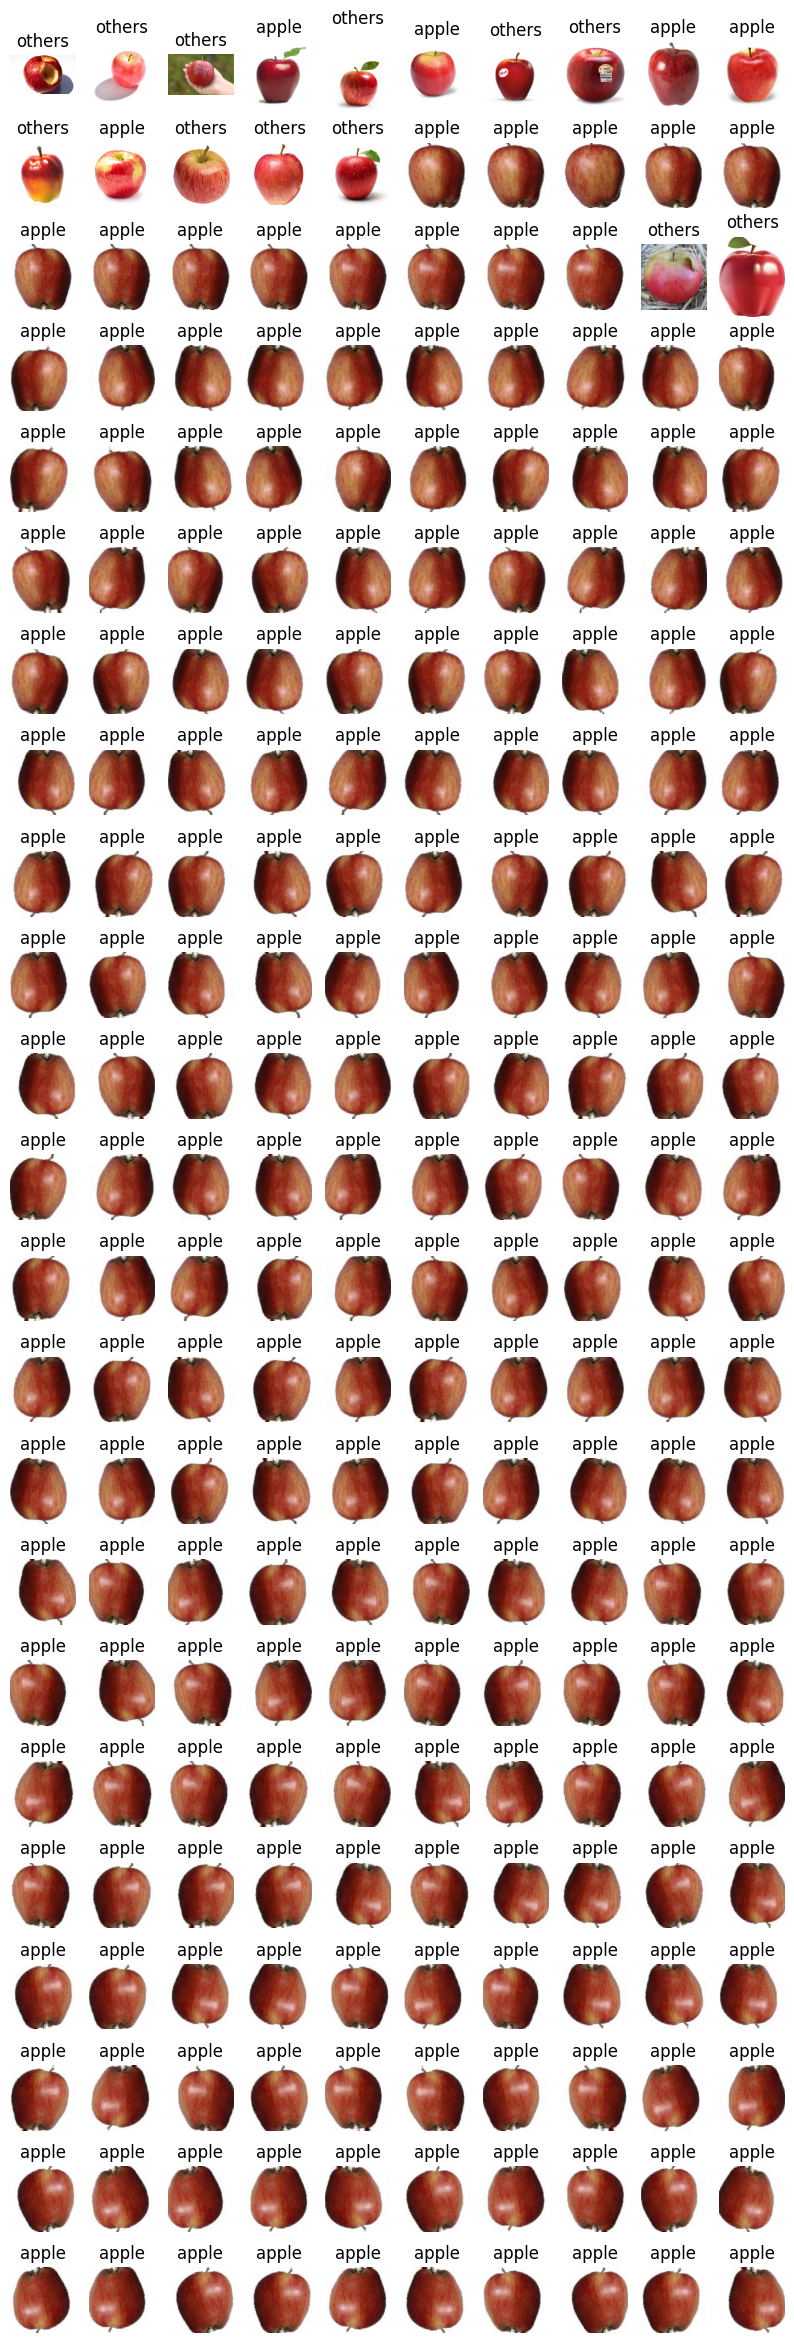

In [167]:
fig4 = plt.figure(figsize=(10, 30))
for i in range(23):
    for j in range(10):
        img = load_img(img_path[i * 10 + j])  # read the image
        plt.subplot(23, 10, i * 10 + j + 1)
        plt.title("apple" if y_predict_ms[i * 10 + j] == normal_apple_id else "others")
        plt.imshow(img), plt.axis("off")

plt.show()

In [148]:
y_predict_ms_test = cnn_ms.predict(X_test)

In [149]:
print(y_predict_ms_test.shape)
print(y_predict_ms_test)

(12,)
[ 0  0  0  0  3 10  0  0  7  0  8  0]


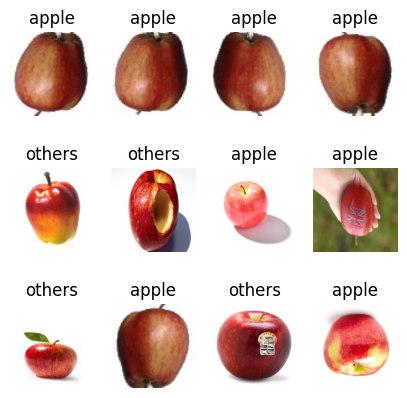

In [150]:
# visualize the result
fig5 = plt.figure(figsize=(5, 5))
for i in range(3):
    for j in range(4):
        img = load_img(img_path_test[i * 4 + j])  # read the image
        plt.subplot(3, 4, i * 4 + j + 1)
        plt.title(
            "apple" if y_predict_ms_test[i * 4 + j] == normal_apple_id else "others"
        )
        plt.imshow(img), plt.axis("off")
plt.show()

In [151]:
# PCA降维
from sklearn.preprocessing import StandardScaler

stds = StandardScaler()
X_norm = stds.fit_transform(X)
# PCA analysis
from sklearn.decomposition import PCA

pca = PCA(n_components=200)
X_pca = pca.fit_transform(X_norm)

In [152]:
print(type(X_pca), X_pca.shape)
print(X_pca[0, :])

<class 'numpy.ndarray'> (230, 200)
[ 1.95376023e+01 -4.14022072e+00  4.28433455e+01  1.55853639e+02
 -2.03774226e+01  1.04473321e+02  1.93359708e+02 -1.55860042e+02
  1.80222318e+01 -5.67139904e+01  1.97411933e+01  1.19245134e+01
  4.10238353e+00 -1.89529366e+00 -3.15164849e+00 -6.00097738e+00
  1.15885942e+00  2.40294830e+00  2.90139156e+00  8.76944722e-01
 -4.82569944e+00 -1.66692878e+00 -4.88518943e+00  1.08932076e+00
  4.22848983e+00 -2.31217057e+00 -2.56877814e+00  2.20369401e+00
 -1.20530223e+00 -1.86353936e+00  1.78909377e+00  1.13265926e+00
 -3.49301688e+00 -1.26327367e+00  2.56507960e+00 -4.94408914e-01
 -2.55722675e+00 -7.72610602e-01  1.72809989e-01 -7.47669494e-01
  2.01166337e+00  1.51515587e-02  6.54904814e-01  7.14400282e-01
 -1.53273466e-01  1.88113164e-02 -1.41422427e-01  7.29477276e-01
 -4.08963538e-01  1.07715392e+00 -3.61100843e-02 -1.94640524e-01
  5.73379632e-01  3.62034523e-01 -7.85718441e-01 -4.79853416e-01
 -2.61775179e-01 -3.15966796e-01  1.36134103e+00 -9.652

In [153]:
# calculate the variance ratio of each components
var_ratio = pca.explained_variance_ratio_
print(np.sum(var_ratio))

0.9838306355033917


In [154]:
# PCA 简化后的维度是 200， 原始的数据维度是 25088
print(X_pca.shape, X.shape)

(230, 200) (230, 25088)


In [155]:
# meanshift
from sklearn.cluster import MeanShift, estimate_bandwidth

# obtain the bandwidth
bw = estimate_bandwidth(X_pca, n_samples=140)
print(bw)
# set up meanshift model
cnn_pca_ms = MeanShift(bandwidth=bw)
cnn_pca_ms.fit(X_pca)

149.44850172588792


MeanShift(bandwidth=149.44850172588792)

In [156]:
cnn_pca_ms.get_params(True)

{'bandwidth': 149.44850172588792,
 'bin_seeding': False,
 'cluster_all': True,
 'max_iter': 300,
 'min_bin_freq': 1,
 'n_jobs': None,
 'seeds': None}

In [157]:
# make prediction
y_predict_pca_ms = cnn_pca_ms.predict(X_pca)
print(y_predict_pca_ms)

[ 6 12  2  9 14  0  8  3 15 13 11  7  5 16 10  0  0 19  0  0  0  0  0  0
  0  0  0  0  1  4  0  0  0  0  0  0  0  0  0  0 17  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0 18  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 20
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0 21  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0 22  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0]


In [158]:
# 预测结果统计

print(Counter(y_predict_pca_ms))

Counter({0: 208, 6: 1, 12: 1, 2: 1, 9: 1, 14: 1, 8: 1, 3: 1, 15: 1, 13: 1, 11: 1, 7: 1, 5: 1, 16: 1, 10: 1, 19: 1, 1: 1, 4: 1, 17: 1, 18: 1, 20: 1, 21: 1, 22: 1})


In [159]:
normal_apple_id = 0

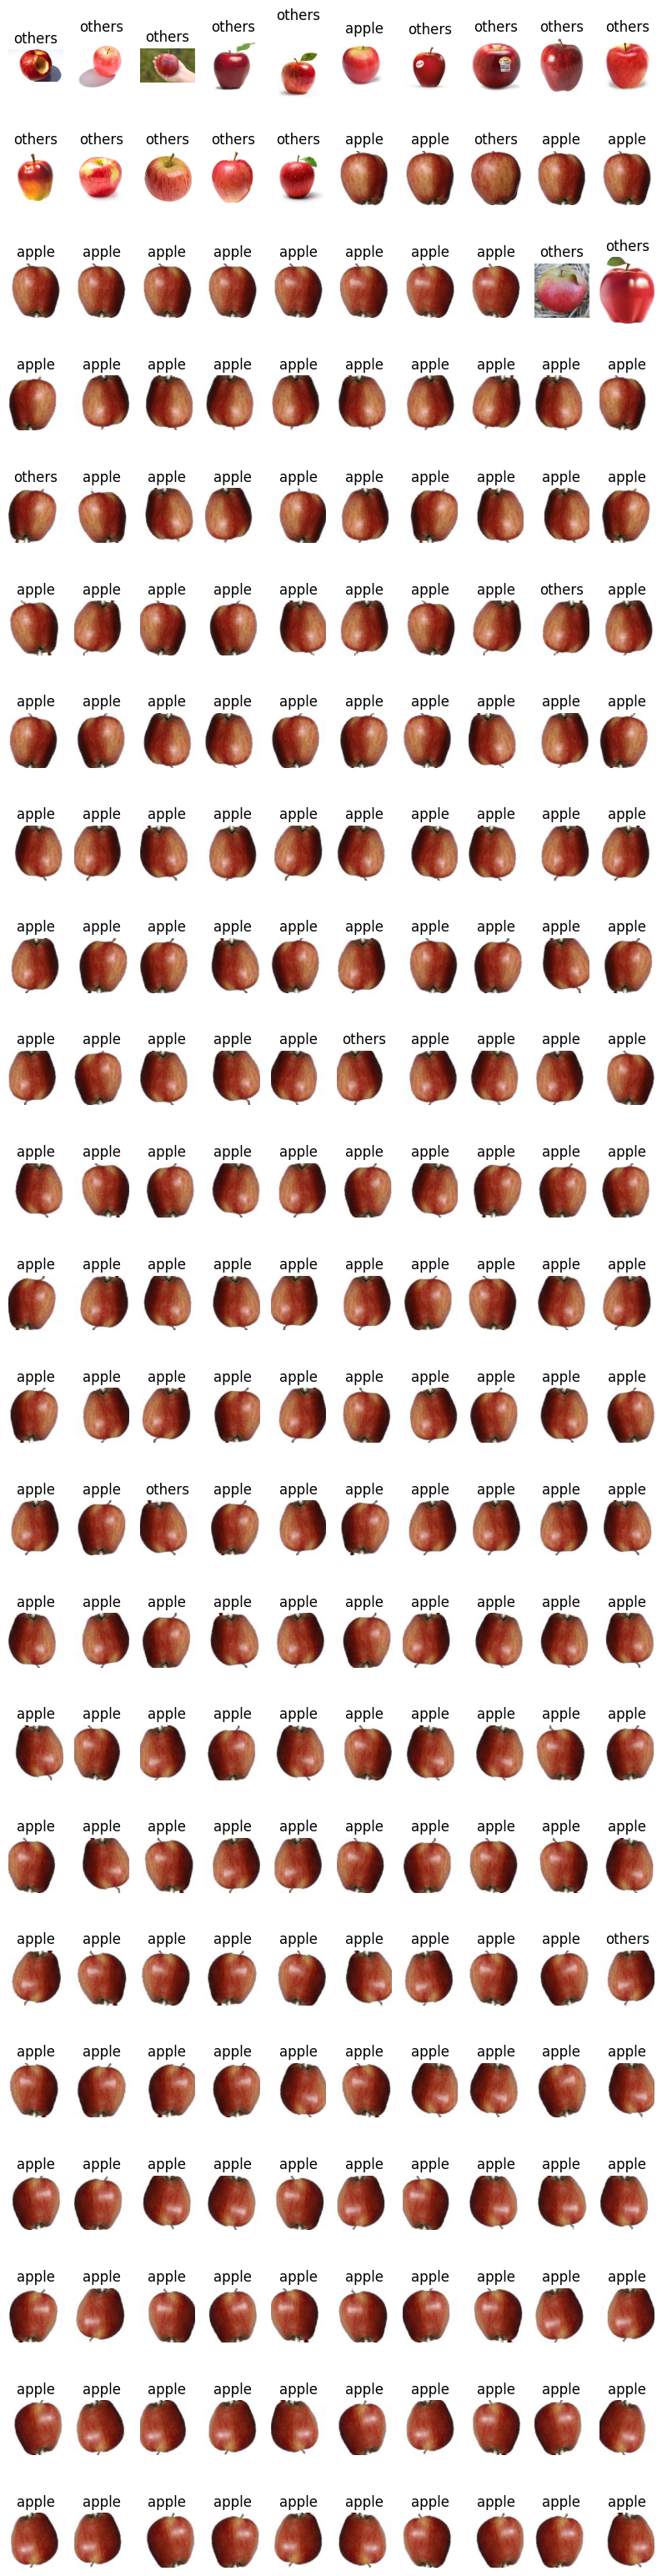

In [160]:
fig6 = plt.figure(figsize=(10, 40))
for i in range(23):
    for j in range(10):
        img = load_img(img_path[i * 10 + j])  # read the image
        plt.subplot(23, 10, i * 10 + j + 1)
        plt.title(
            "apple" if y_predict_pca_ms[i * 10 + j] == normal_apple_id else "others"
        )
        plt.imshow(img), plt.axis("off")

plt.show()

In [161]:
X_norm_test = stds.transform(X_test)
X_pca_test = pca.transform(X_norm_test)

In [162]:
y_predict_pca_ms_test = cnn_pca_ms.predict(X_pca_test)
print(y_predict_pca_ms_test)

[ 0  0  0  0 11  6  7 18 14  0  3  0]


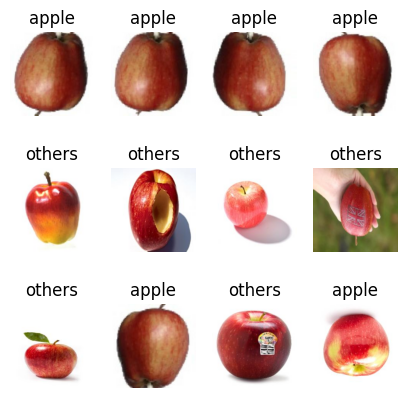

In [163]:
# visualize the result
fig7 = plt.figure(figsize=(5, 5))
for i in range(3):
    for j in range(4):
        img = load_img(img_path_test[i * 4 + j])  # read the image
        plt.subplot(3, 4, i * 4 + j + 1)
        plt.title(
            "apple" if y_predict_pca_ms_test[i * 4 + j] == normal_apple_id else "others"
        )
        plt.imshow(img), plt.axis("off")
plt.show()